<a href="https://colab.research.google.com/github/agrgal/conjeturaFermat/blob/main/Fermat2Mejoras_5_08_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Intentar resolver la conjetura de Fermat es una arrogancia por mi parte. Pero también un divertimento que me ha llevado ratos desde hace unos tres años, ocupando el tiempo con algo tras las largas jornadas del confinamiento. No creo haberlo conseguido. Me falta competencia matemática para ello, evidentemente. Pero creo haber llegado a algunas conclusiones que, si no están erradas, pueden tener cierto interés. Pero no son suficientes para demostrar la conjetura.

## Conjetura de Fermat

La conjetura de Fermat dice: si n es un número entero mayor o igual que 3, entonces no existen números enteros positivos x, y y z, tales que se cumpla la igualdad...

**$$x^n + y^n = z^n$$**

## Consideraciones previas

1. ¿Cómo tienen que ser estos números? Demostrar una trivialidad
    1. $y^n > 0$, ya que “y” es un entero positivo y n es mayor que 3 y entero positivo.
    1. Luego $x^n > 0$, ya que también "x"lo es.
    1. Si sumo este término al anterior...
        1. $x^n + y^n >x^n$
        1. Simétricamente  $x^n + y^n >y^n$
        1. Es decir, la suma de dos enteros elevados a la n-potencia (cumpliendo $n>=3$ y $x>0, y>0$) siempre será mayor que cualquiera de esos términos elevados a n
    1. Luego un hipotético número z que cumpliese la igualdad, debe ser un número mayor que x, o mayor que y. No puede ser x, ni puede ser y, ni pueden ser números menores que y o x. $z>y$ y $z>x$
1. Por tanto encuentro una cota de números para z.
    1. $\vee z \in \mathbb{Z}^{+} / z\leqslant x \;\;o\;\; z\leqslant y \Rightarrow x^n+y^n>z^n$
    1. Es decir, si z es menor o igual que x o z es menor o igual que y, nunca se cumplirá la igualdad. Siempre el término $z^n$ será menor que $x^n + y^n$.
1. Como x, y son enteros positivos, y son distintos (si fuesen iguales la ecuación es trivial que no se cumple, ya que la solución z no es un número entero positivo), supongo que **y>x** a partir de este punto.
1. Por lo tanto, hasta ahora sé que los números enteros positivos en el intervalo $z \in [1,y]$ no cumplen la igualdad. ¿Qué ocurre con los números enteros a partir del y+1?  
1. ***¿Cumple la igualdad algún número $z \in [y+1, \infty)$ ?***

---

### Desarrollo previo

Quería seguir una intuición. Por ejemplo, tengo tres números consecutivos elevados a 3 (n=3): **7 , 8 y 9**. En este caso:
* $7^3=343$
* $8^3=512$
* $9^3=729$ cuando $7^3+8^3=855$

En este caso, elevar z al cubo resulta un número menor que la suma de los otros dos. Sin embargo, si con los mismos números voy aumentando el exponente llega un momento en que $z^n$ crece más que la suma $x^n+y^n$. Hay una inflexión en la desigualdad en algún punto entre $n^*$ y $n^*+1$. ¿Habrá algún caso en que se cumpliese la igualdad para un $n^*$?

Por poner un ejemplo, para la terna siguiente, calculo varios exponentes partiendo de n=3.


In [ ]:
from IPython.display import HTML, display
from tabulate import tabulate

x, y, z = 11,12,13
data=[]

print(f'Para la terna de números {x,y,z}')

for i in range(3,10):
    valor = 'mayor' if z**i>x**i+y**i  else 'menor'
    data.append([i,x,y,z,x**i,y**i,x**i+y**i,z**i, valor])

cadena = tabulate(data, headers=['i','x','y','z','x^n', 'y^n','x^n+y^n','z^n',"¿z^n>suma?"],tablefmt="html")

font_size = '14pt'
html_code = f'<div style="font-size:{font_size};">{cadena}</div>'
display(HTML(html_code))


Para la terna de números (11, 12, 13)


i,x,y,z,x^n,y^n,x^n+y^n,z^n,¿z^n>suma?
3,11,12,13,1331,1728,3059,2197,menor
4,11,12,13,14641,20736,35377,28561,menor
5,11,12,13,161051,248832,409883,371293,menor
6,11,12,13,1771561,2985984,4757545,4826809,mayor
7,11,12,13,19487171,35831808,55318979,62748517,mayor
8,11,12,13,214358881,429981696,644340577,815730721,mayor
9,11,12,13,2357947691,5159780352,7517728043,10604499373,mayor


En la que la tendencia es a que $z^n$ es un número mayor que la suma $x^n+ y^n$, a partir de $n \geq 4$

* Supongamos que elegimos un número $y \in \mathbb{Z}^{+} / y> 2$. Lo elevo a n. ¿Con qué número x - elevado a n - al sumarlo al “y-ene” dará la máxima suma (Teniendo en cuenta de que siempre $x<y$)? Evidentemente con justo el anterior (y-1). Así que, elegido un número “y” la máxima suma se produce cuando escojo x = y-1

* Por ejemplo, sea n=4. Si tomo el valor de y=4 también, tendría el punto $A=[4,256]$. La suma se haría máxima con el valor de $x = y -1 = 3$ en el punto $B=[3,81]$


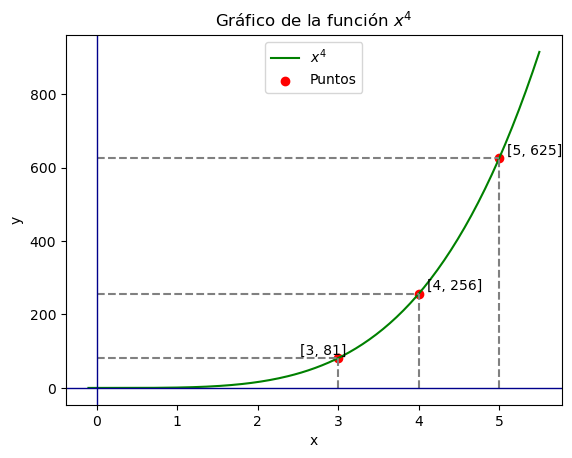

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def funcion_x4(x):
    return x**4

# Generamos puntos para el gráfico
x_vals = np.linspace(-0.1, 5.5, 200)
y_vals = funcion_x4(x_vals)

# Puntos a marcar
x_puntos = [3, 4, 5]
y_puntos = [funcion_x4(x) for x in x_puntos]

# Configuración del gráfico
plt.plot(x_vals, y_vals, label='$x^4$',color='green')
plt.scatter(x_puntos, y_puntos, color='red', label='Puntos')

# Etiquetas y título del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de la función $x^4$')

# Leyenda
plt.legend()

# Mostrar los valores de los puntos en la gráfica
for x, y in zip(x_puntos, y_puntos):
    plt.text(x+0.1, y+2, f'[{x}, {y}]', ha='right' if x == 3 else 'left', va='bottom')

# Líneas verticales desde los puntos hasta los ejes de abscisas
for x, y in zip(x_puntos, y_puntos):
    plt.plot([x, x], [0, y], linestyle='dashed', color='gray')
    plt.plot([0, x], [y, y], linestyle='dashed', color='gray')

# Mostrar el gráfico
plt.grid(False)
plt.axhline(0, color='darkblue', linewidth=1)
plt.axvline(0, color='darkblue', linewidth=1)
plt.show()


* Cabe preguntarse ahora, si el siguiente número mayor que 4, z=5, al elevarlo a n=4 ¿Es mayor o menor que la suma de los otros dos términos elevados a n? Evidentemente si escogemos números z a partir de 5, crecientes, llegará un punto en que sea siempre $z^n > (y-1)^n + y^n$



* Por lo tanto, podemos afirmar que existe un número m entero positivo, que sumado al número "y" y elevado a "n" será mayor que la suma de los términos y e y-1 (elevados a la n-ésima potencia).  

    $$ \exists m \in \mathbb{Z}^{+} \; / \; (y+m)^n > (y-1)^n+y^n $$

* Nunca se cumpliría en el caso en que m=0. Ya lo hemos razonado en el punto 1.D de las consideraciones previas. En principio, $m \in [1,\infty) $

* Se demostraría que la igualdad que expresa $x^n+y^n = z^n$ no se cumple nunca **estrictamente** si somos capaces de demostrar que, para cualquier n...

 $$ \exists \;m \; \in \mathbb{Z}^{+} \; / \; (y+m)^n > (y-1)^n+y^n > (y+m-1)^n $$

 * Y si existiese ese número m, nunca sería un entero positivo $ (y+m)^n = (y-1)^n+y^n \; \Rightarrow \; m \notin \mathbb{Z}^+ $.  

---

### Caso m=1

 En el caso m=1, la segunda parte de la desigualdad es trivial, siempre se cumple, ya que $(y-1)^n+y^n > y^n$

#### Y para la primera parte de la igualdad $(y+1)^n>(y-1)^n+y^n$

$$ (y+1)^n= \binom{n}{0} y^n + \binom{n}{1} y^{n-1} + \binom{n}{2} y^{n-2} +.... + \binom{n}{n-1} y + \binom{n}{n}$$

$$(y+1)^n = \sum_{k=0}^{n}  \binom{n}{k} y^{n-k} $$

$$(y-1)^n= \binom{n}{0} y^n - \binom{n}{1} y^{n-1} + \binom{n}{2} y^{n-2} +.... - \binom{n}{n-1} y + \binom{n}{n} $$

$$(y-1)^n = \sum_{k=0}^{n}  \binom{n}{k} y^{n-k} \cdot (-1)^k $$

Puedo restar en ambos miembros de la desigualdad la cantidad positiva $(y-1)^n$ sin alterarla.

$$(y+1)^n - (y-1)^n > y^n$$

Por lo tanto, se cancelan los términos donde k es par y se suman los términos donde k es impar. Luego si…

$$ 2 \cdot \left [\binom{n}{1} y^{n-1} + \binom{n}{3} y^{n-3} +...   \right ]> y^n $$

$$ k = 2p -1 \;,\; donde \;p\in [1,\beta] \;siendo\;\beta= {{n} \over{2}} \;con\; n\; par\;y\;\beta= {{n+1} \over{2}}\;con\; n\; impar\
$$

$$ 2 \cdot \left [\sum_{p=1}^{\beta}   \binom{n}{2p-1} y^{n-(2p-1)}\right ] > y^n $$

$$ 2 \cdot y^n \cdot \left [\sum_{p=1}^{\beta}   \binom{n}{2p-1} \frac{1}{y^{(2p-1)}}\right ] > y^n
$$

Divido ambos miembros entre $y^n$ y reordeno:

$$\sum_{p=1}^{\beta}   \binom{n}{2p-1} \frac{1}{y^{(2p-1)}} > \frac{1}{2}
 $$

$$\sum_{p=1}^{\beta}   \binom{n}{2p-1} \frac{1}{y^{(2p-1)}} = \binom{n}{1} \frac{1}{y} + \binom{n}{3} \frac{1}{y^3}+... = \frac{n!}{1!(n-1)!)}\frac{1}{y} + \frac{n!}{3!(n-3)!)}\frac{1}{y^3}+...>\frac{1}{2} $$

$$[A] \;\; \frac{n}{y}+\frac{n \cdot (n-1) \cdot (n-2)}{6} \cdot \frac{1}{y^3} +...> \frac{1}{2} $$

¿Qué podemos decir de la expresión [A]?

* Si $n/y>1/2$ la expresión A se cumple, ya que los términos segundo y posteriores son siempre positivos.
* Si $n/y=1/2$ la expresión A se cumple, ya que al sumarse segundo y posteriores términos dicha expresión A es mayor que 1/2.

Podríamos entonces afirmar que:

***$$ \vee x,y,z \in \mathbb{Z}^{+}, \vee n \in \mathbb{N} / \; n\geq 3\: ,\: x<y,z>y,\; si\; n\geq y/2 \Rightarrow z^n > x^n + y^n $$***

En el siguiente ejemplo:  

* Se obtiene un número aleatorio 'y' entre 6 y 50
    * 6 cumple que $3 \geq 6/2$ (empezar en n=3). El número 50 es un límite superior.
* Se calcula el número x = y -1
* Se obtiene el primer número n que cumple que $n \geq y/2$
* Se genera un barrido de números a partir del z = y+1 manteniendo 'n'
* Se genera otro barrido de números con z = y +1, esta vez aumentando los exponentes 'n'.
* Se observa que siempre, en cualquier caso, $z^n$ es mayor que $x^n+y^n$

In [ ]:
from IPython.display import HTML, display
from tabulate import tabulate
import random, math

def generar_numero_aleatorio(a, b):
    return random.randint(a, b)

data=[]
data2=[]

# generamos el número y
y = generar_numero_aleatorio(6,50) # a partir de n=3 , entonces y=6
x = y-1

# generamos un número n, n>=y/2
n =  math.ceil(y/2)

print(f'Caso para x: {x} e y:{y} con el valor del exponente n fijo a {n}')

for z in range(y+1,y+10):
    valor = 'mayor' if z**n>x**n+y**n  else 'menor'
    data.append([n,x,y,z,x**n+y**n,z**n, valor])

cadena = tabulate(data, headers=['n','x','y','z','x^n+y^n','z^n',"¿z^n>suma?"],tablefmt="html")

font_size = '14pt'
html_code = f'<div style="font-size:{font_size};">{cadena}</div>'
display(HTML(html_code))

z=y+1
print(f'Caso para y: {y} y z:{z} y aumenten los exponentes')

for i in range(n,n+10):
    valor = 'mayor' if z**i>x**i+y**i  else 'menor'
    data2.append([i,x,y,z,x**i+y**i,z**i, valor])

cadena2 = tabulate(data2, headers=['n','x','y','z','x^n+y^n','z^n',"¿z^n>suma?"],tablefmt="html")

font_size = '14pt'
html_code = f'<div style="font-size:{font_size};">{cadena2}</div>'
display(HTML(html_code))

Caso para x: 36 e y:37 con el valor del exponente n fijo a 19


n,x,y,z,x^n+y^n,z^n,¿z^n>suma?
19,36,37,38,996251283736501407410467295389,1037261684426834491014632701952,mayor
19,36,37,39,996251283736501407410467295389,1699133621328831977374894383159,mayor
19,36,37,40,996251283736501407410467295389,2748779069440000000000000000000,mayor
19,36,37,41,996251283736501407410467295389,4394336169668803158610484050361,mayor
19,36,37,42,996251283736501407410467295389,6946027806565873025328496508928,mayor
19,36,37,43,996251283736501407410467295389,10861771343660416614908294685907,mayor
19,36,37,44,996251283736501407410467295389,16811282773058972887713478344704,mayor
19,36,37,45,996251283736501407410467295389,25765451768359987049102783203125,mayor
19,36,37,46,996251283736501407410467295389,39119996021684678459081876832256,mayor


Caso para y: 37 y z:38 y aumenten los exponentes


n,x,y,z,x^n+y^n,z^n,¿z^n>suma?
19,36,37,38,996251283736501407410467295389,1037261684426834491014632701952,mayor
20,36,37,38,36489978205504892794525099763377,39415944008219710658556042674176,mayor
21,36,37,38,1336761699064837299329589845268373,1497805872312349005025129621618688,mayor
22,36,37,38,48978953062000605648752625819773065,56916623147869262190954925621510144,mayor
23,36,37,38,1794896990371680929651928010945960909,2162831679619031963256287173617385472,mayor
24,36,37,38,65787514818547901140452247207117423777,82187603825523214603738912597460647936,mayor
25,36,37,38,2411685790578917784956645935539552004933,3123128945369882154942078678703504621568,mayor
26,36,37,38,88424092973955193982752760014506887889145,118678899924055521887798989790733175619584,mayor
27,36,37,38,3242593314047610671178699094920319545336829,4509798197114109831736361612047860673544192,mayor
28,36,37,38,118928420084167260611018357589860152141247377,171372331490336173605981741257818705594679296,mayor


---

### Caso m>1

Ya hemos demostrado que si m=1, la desigualdad $(y+1)^n>(y-1)^n+y^n$ se cumple siempre que $n \geq y/2$. Cabe ahora preguntarse. ¿Y si se cumple...?

- $n \geq 3$, la condición del enunciado.
- $n/y<1/2$, condición contraria a la considerada en el apartado anterior. Luego $y>2n$.

* ¿Podremos calcular un **m** que cumpla...? $$ \exists \;m \; \in \mathbb{Z}^{+} \; / \; (y+m)^n > (y-1)^n+y^n > (y+m-1)^n $$

#### Parte derecha de la desigualdad $(y+m)^n > (y-1)^n+y^n$

$$ y^n + \sum_{k=1}^{n} \binom{n}{k} \cdot y^{n-k} \cdot m^k > {(y-1)}^n + y^n $$

$$ \sum_{k=1}^{n} \binom{n}{k} \cdot y^{n-k} \cdot m^k > {(y-1)}^n $$

$$ n \cdot y^{n-1} \cdot m + \sum_{k=2}^{n} \binom{n}{k} \cdot y^{n-k} \cdot m^k > {(y-1)}^n $$

Voy a considerar que este primer término del desarrollo del binomio, el de mayor exponente (dominante), ya es mayor que $(y-1)^n$, entonces  $ n \cdot y^{n-1} \cdot m > {(y-1)}^n $. Si fuera así...

$$  m>\frac{ {(y-1)}^n}{n \cdot y^{n-1}} $$

Lo que nos daría un límite inferior para m.

#### Parte izquierda de la desigualdad $(y-1)^n+y^n > (y+m-1)^n$

$$ {(y-1)}^n + y^n > {(y-1)}^n + \sum_{k=1}^{n} \binom{n}{k} \cdot {(y-1)}^{n-k} \cdot m^k $$

$$ y^n >  \sum_{k=1}^{n} \binom{n}{k} \cdot {(y-1)}^{n-k} \cdot m^k $$

$$ y^n >  n \cdot {(y-1)}^{n-1} \cdot m + \sum_{k=2}^{n} \binom{n}{k} \cdot {(y-1)}^{n-k} \cdot m^k $$

Y de forma análoga a lo anterior, si $y^n$ es mayor que toda la expresión, también lo es del primer término: $  y^n >  n \cdot {(y-1)}^{n-1} \cdot m$. Luego obtengo una cota superior para 'm':

$$ m < \frac{y^n}{ n \cdot {(y-1)}^{n-1} \cdot} $$

---

Por lo tanto, encontramos cotas superiores e inferiores para 'm'

$$ \frac{y^n}{ n \cdot {(y-1)}^{n-1} \cdot} > m > \frac{(y-1)^n}{ n \cdot {y}^{n-1} \cdot} $$

- Podemos observar que $ \frac{y^n}{ n \cdot {(y-1)}^{n-1} \cdot} > \frac{(y-1)^n}{ n \cdot {y}^{n-1} \cdot} $ es trivialmente cierto, ya que, operando $y^n \cdot y^{n-1} > {(y-1)}^n \cdot {(y-1)}^{n-1}$

- En el siguiente ejemplo, genero exponentes aleatorios a partir del número 3, y escogemos números 'y' mayores de 2n. Con esos valores, se puede observar que podemos calcular un intervalo para m, donde siempre existe al menos un valor entero positivo en el que se cumple la premisa $(y+m)^n > (y-1)^n+y^n > (y+m-1)^n$

* Se muestran los logaritmos de los términos elevados a 'n' por razones de espacio.

In [1]:
from IPython.display import HTML, display
from tabulate import tabulate
import random, math

def generar_numero_aleatorio(a, b):
    return random.randint(a, b)

data=[]
data2=[]

# generamos el número n
n = generar_numero_aleatorio(3,5) # a partir de n=3
# n = 8
# y = generar_numero_aleatorio(2*n+1,2*n+200) # y tiene que ser mayor que 2n
y = 2*n+1
x = y -1

# Los límites calculados para m.
msup = (y**n)/(n*(y-1)**(n-1))
minf = ((y-1)**n)/(n*y**(n-1))

data2 = list(range(math.ceil(minf)-5,math.floor(msup)+5+1,1)) #rango 5 por abajo y 5 por arriba
data2 = [x for x in data2 if x>0] # me quedo solo con los positivos

print(f'Caso para n: {n} e y:{y} ; datos: {data2}')

print(f'Caso para n: {n} e y:{y} ; msup:{msup} [{math.floor(msup)}] y minf:{minf} [{math.ceil(minf)}]')


for m in data2: #por cada valor de m
    z = y+m
    valor = 'mayor' if z**n>x**n+y**n  else 'menor'
    mm = 'inf' if m==math.ceil(minf) else 'sup' if m==math.floor(msup) else '-'
    data.append([n,x,y,z,mm,math.log(x**n+y**n),math.log(z**n), valor])

cadena = tabulate(data, headers=['n','x','y','z','m','ln(x^n+y^n)','ln(z^n)',"¿z^n>suma?"],tablefmt="html")

font_size = '14pt'
html_code = f'<div style="font-size:{font_size};">{cadena}</div>'
display(HTML(html_code))


Caso para n: 4 e y:9 ; datos: [1, 2, 3, 4, 5, 6, 7, 8]
Caso para n: 4 e y:9 ; msup:3.20361328125 [3] y minf:1.4046639231824416 [2]


n,x,y,z,m,ln(x^n+y^n),ln(z^n),¿z^n>suma?
4,8,9,10,-,9.27397,9.21034,menor
4,8,9,11,inf,9.27397,9.59158,mayor
4,8,9,12,sup,9.27397,9.93963,mayor
4,8,9,13,-,9.27397,10.2598,mayor
4,8,9,14,-,9.27397,10.5562,mayor
4,8,9,15,-,9.27397,10.8322,mayor
4,8,9,16,-,9.27397,11.0904,mayor
4,8,9,17,-,9.27397,11.3329,mayor


* Al operar en el ejemplo anterior podemos observar que el límite inferior de 'm' no está bien calculado con la consideración anterior. En muchos casos existen 'm' inferiores al calculado que aún cumplen la condición de ser $(y+m)^n > (y-1)^n+y^n$. Se necesita un mejor ajuste de la cota inferior para 'm'.

---

### Considero tener en cuenta el segundo término del binomio para la cota inferior

#### Parte derecha de la desigualdad $(y+m)^n > (y-1)^n+y^n$

$$ y^n + \sum_{k=1}^{n} \binom{n}{k} \cdot y^{n-k} \cdot m^k > {(y-1)}^n + y^n $$

$$ \sum_{k=1}^{n} \binom{n}{k} \cdot y^{n-k} \cdot m^k > {(y-1)}^n $$

$$ n \cdot y^{n-1} \cdot m + \frac{n \cdot (n-1)}{2} \cdot y^{n-2} \cdot m^2 + \sum_{k=3}^{n} \binom{n}{k} \cdot y^{n-k} \cdot m^k > {(y-1)}^n $$

$$ n \cdot y^{n-1} \cdot m + \frac{n \cdot (n-1)}{2} \cdot y^{n-2} \cdot m^2 > {(y-1)}^n $$

Operando,y teniendo en cuenta los dos primeros términos del binomio,  tenemos que...

$$ m + \frac{\left (n-1  \right )}{2} \cdot  \frac{1}{y} \cdot m^2 >\frac{ {(y-1)}^n}{n \cdot y^{n-1}} $$

Podremos obtener un valor de m ($m_{inf}$) más ajustado si la función no lineal que puede obtenerse de $m>\frac{ {(y-1)}^n}{n \cdot y^{n-1}} \cdot \frac{1}{\left (1+\left ( \frac{n-1}{2} \right ) \cdot \frac{1}{y}  \right ) \cdot m}$ , $f(m)=0 \;,\;  f(m)=m-\frac{A}{(1+B) \cdot m}$ donde

$$ A = \frac{ {(y-1)}^n}{n \cdot y^{n-1}}\: \:, \: \: B = \left ( \frac{n-1}{2} \right ) \cdot \frac{1}{y} $$




In [7]:
from IPython.display import HTML, display
from tabulate import tabulate
import random, math

def generar_numero_aleatorio(a, b):
    return random.randint(a, b)

data=[]
data2=[]

# generamos el número n
n = generar_numero_aleatorio(3,10000) # a partir de n=3
# n = 52143 --> este caso comprueba que mejora el anterior código
# n = 8
# y = generar_numero_aleatorio(2*n+1,2*n+200) # y tiene que ser mayor que 2n
y = 2*n+1
# y = 104287 --> este caso comprueba que mejora el anterior código
x = y -1

# Los límites calculados para m.
msup = (y**n)/(n*(y-1)**(n-1))

# Calculo un límite inferior más ajustado usando el método de Newton
A = ((y-1)**n)/(n*y**(n-1))
B = (n-1)/(2*y)

minf = A
iteraciones = 20
for i in range(0,iteraciones):
    fm = minf - A/((1+B)*minf)
    dfm = minf + A/((1+B)*minf*minf)
    minf = minf - fm/dfm
    # print(minf)

print(f'Valor inicial de minf: {A} y tras {iteraciones} iteraciones minf = {minf} ')

data2 = list(range(math.ceil(minf)-5,math.floor(msup)+5+1,1)) #rango 5 por abajo y 5 por arriba
data2 = [x for x in data2 if x>0] # me quedo solo con los positivos

print(f'Caso para n: {n} e y:{y} ; datos: {data2}')

print(f'Caso para n: {n} e y:{y} ; msup:{msup} [{math.floor(msup)}] y minf:{minf} [{math.ceil(minf)}]')


for m in data2: #por cada valor de m
    z = y+m
    valor = 'mayor' if z**n>x**n+y**n  else 'menor'
    mm = 'inf' if m==math.ceil(minf) else 'sup' if m==math.floor(msup) else '-'
    data.append([n,x,y,z,mm,math.log(x**n+y**n),math.log(z**n), valor])

cadena = tabulate(data, headers=['n','x','y','z','m','ln(x^n+y^n)','ln(z^n)',"¿z^n>suma?"],tablefmt="html")

font_size = '14pt'
html_code = f'<div style="font-size:{font_size};">{cadena}</div>'
display(HTML(html_code))

Valor inicial de minf: 1.2131400900159017 y tras 20 iteraciones minf = 0.9851610635378809 
Caso para n: 9625 e y:19251 ; datos: [1, 2, 3, 4, 5, 6, 7, 8]
Caso para n: 9625 e y:19251 ; msup:3.297399719232226 [3] y minf:0.9851610635378809 [1]


n,x,y,z,m,ln(x^n+y^n),ln(z^n),¿z^n>suma?
9625,19250,19251,19252,inf,94954.2,94954.2,mayor
9625,19250,19251,19253,-,94954.2,94954.7,mayor
9625,19250,19251,19254,sup,94954.2,94955.2,mayor
9625,19250,19251,19255,-,94954.2,94955.7,mayor
9625,19250,19251,19256,-,94954.2,94956.2,mayor
9625,19250,19251,19257,-,94954.2,94956.7,mayor
9625,19250,19251,19258,-,94954.2,94957.2,mayor
9625,19250,19251,19259,-,94954.2,94957.7,mayor


* Generando números aleatorios con exponente hasta 10000, y siempre que y>2n (se puede tomar y=2n+1 o superior a este número), observo que la cota inferior calculada de 'm' o bien es 1, cumpliéndose que $(y+1)^n>(y-1)^n+y^n$ o bien 'm>1' cumpliéndose que  $(y+m)^n>(y-1)^n+y^n>(y+m-1)^n$. El término m-1 aparece siempre menor que la suma.
* Se muestran los logaritmos de los términos elevados a 'n' por razones de espacio.